## 2. The Barabasi-Albert Model

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
from __future__ import division

## Create our own Barabasi-Albert mode

> *Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.*

<function matplotlib.pyplot.show>

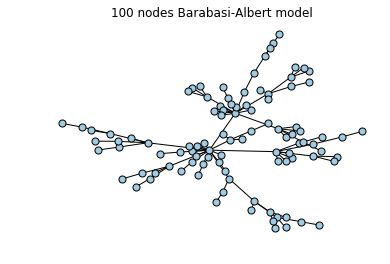

In [2]:
# Keep track of the number of nodes added
nodesAdded = 0

#Set up the Graph
BA = nx.Graph()
BA.add_nodes_from([0,1])  #First Nodes
nodesAdded = 2            #Update the number of nodes added
BA.add_edge(0,1)          #Add th first edge

#Create a connection list
connection = [0,1]

#Go up to 100 nodes network
while nodesAdded<100:
    BA.add_node(nodesAdded)            #Add one more node
    no = random.choice(connection)     #Choose a node to build a connection with 
    #(in the connection list the number of occurences of a node is proportionnal with its degree)
    BA.add_edge(nodesAdded,no)         #Add the corresponding connection
    connection.append(nodesAdded)      #Update connection seq
    connection.append(no)              #Update connection seq
    nodesAdded = nodesAdded +1         #Update nb of nodes

#Draw the network built
nx.draw_networkx(BA,node_size= 50, with_labels = False, node_color = "#A0CBE2", edgecolors = "#000000")
plt.axis('off')
plt.title("100 nodes Barabasi-Albert model")
plt.show()

> *Now create a 5000 node network.*
- *What's the maximum and minimum degree? *
- *Now, bin the degree distribution, for example using numpy.histogram.*
- *Plot the distribution. Plot it with both linear and log-log axes.*

In [3]:
#Go up to 5000 nodes network
while nodesAdded<5000:
    BA.add_node(nodesAdded)            #Add one more node
    no = random.choice(connection)     #Choose a node to build a connection with 
    #(in the connection list the number of occurences of a node is proportionnal with its degre)
    BA.add_edge(nodesAdded,no)         #Add the corresponding connection
    connection.append(nodesAdded)      #Update connection seq
    connection.append(no)              #Update connection seq
    nodesAdded = nodesAdded +1         #Update nb of nodes

Minimum degree = 1
Maximum degree = 126


Text(0,0.5,'Log(Number of occurences)')

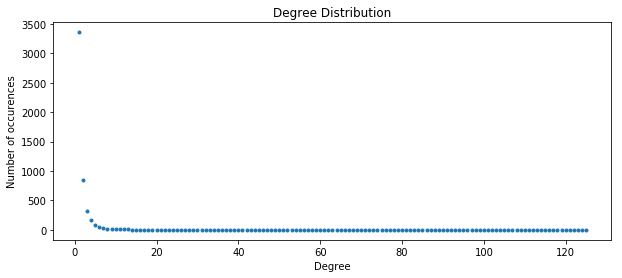

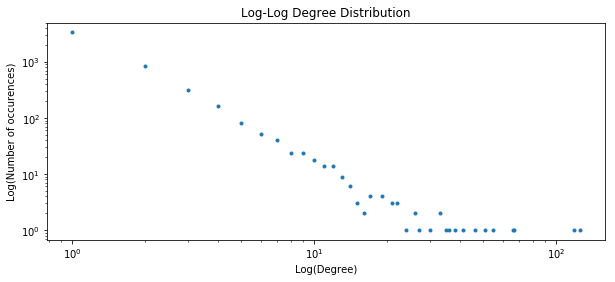

In [4]:
# Get the degree of the graph nodes
degrees = [BA.degree(i) for i in range(nodesAdded)]
    
# Get the minimum and maximum degree
min_bin = np.amin(degrees)
max_bin = np.amax(degrees)
print("Minimum degree = "+str(min_bin))
print("Maximum degree = "+str(max_bin))


# Set up the bins for the degree distribution
nb_bins = int(max_bin)-int(min_bin)              #the number of bins corresponds to the difference 
                                                 #between the maximum and the minimum degree
v = [min_bin+i for i in range(nb_bins+1)]        #store the bins limits
  
#Hist
hist, bin_edges = np.histogram(degrees,bins = v) #use the histogram function to group by the degree

#Plot the Charts

# Normal plot        
plt.figure(figsize = (10,4))
plt.title("Degree Distribution")
plt.plot(v[0:nb_bins], hist, '.')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')

# Log-Log Plot
plt.figure(figsize = (10,4))
plt.title("Log-Log Degree Distribution")
plt.loglog(v[0:nb_bins], hist, '.')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Number of occurences)')

# 3. Power-laws and the friendship paradox

>*Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:*
* *Pick a node i at random (e.g. use random.choice). Find its degree.*
* *Find i's neighbors. And calculate their average degree.*
* *Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.*
* *Do this 1000 times. How many out of those 1000 times is the friendship paradox true?*

***Pick a node i at random (e.g. use random.choice). Find its degree.***

In [5]:
# Pick a random node
i = np.random.choice(BA.nodes,size = 1)[0]
# Store its degree
degree = BA.degree(i)

print "The degree of node "+str(i)+" (randomly chosen) is "+str(degree)

The degree of node 2812 (randomly chosen) is 1


***Find i's neighbors. And calculate their average degree.***

In [6]:
#Get the neighbors                        
neighbors =[n for n in BA[i]]                         # in networkX 2.2 G[i] gives the neighbors of node i in network G

#Get the average degree of i node neighbors
avDeg = 0.0                                           # create a variable to store the neighbors average degree
for j in range(len(neighbors)):                       # go through the neighbors
    avDeg += BA.degree(neighbors[j])/len(neighbors)   # add the degre of each neighbors divided by the number of neighbors 

print("Average Neighbors Degree = "+str(avDeg))

#Check if the Friendship Paradox is verified
if (degree > avDeg):
    print("The Friendship Paradox is not verified")
else :
    print("The Friendship Paradox is verified")

Average Neighbors Degree = 8.0
The Friendship Paradox is verified


***Do this 1000 times. How many out of those 1000 times is the friendship paradox true?***

In [7]:
# Let's define a function to verify friendship paradox in one case
def verifyFriendshipParadox(A):
    i = np.random.choice(A.nodes,size = 1)[0]             # Pick a random node
    degree = A.degree(i)                                  # Store its degree
    
    neighbors =[n for n in A[i]]                          # Find its neighbors
    
    avDeg = 0                                             # create a variable to store the neighbors average degree
    for j in range(len(neighbors)):                       # go through the neighbors 
        avDeg += BA.degree(neighbors[j])/len(neighbors)   # add the degre of each neighbors divided by the number of neighbors
        #(In this Barabasi-Albert network, constructed like we have done, every node has at least 1 link)

    if (degree > avDeg):
        return 0                                          # if the paradox is not verified return 0
    else :
        return 1                                          # if the paradox is verified return 1

In [8]:
# Let's run this function a 1000 times
verified = 0                                   #store the number of times the paradox has been verified
for a in range(1000):                          #do it a 1000 times
    verified += verifyFriendshipParadox(BA)    #add 1 if the paradox is verified 0 otherwise

print "Over a 1000 times, the Friendship Paradox has been verified "+str(verified)+" times."

Over a 1000 times, the Friendship Paradox has been verified 893 times.
